### Imports

In [1]:
#Imports
import numpy as np
import pandas as pd
import math 
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import missingno as msno
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import classification_report

In [2]:
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD, Adam
from sklearn.model_selection import train_test_split
from keras.models import load_model

### ETL


In [3]:
df = pd.read_csv("/Users/puil/OneDrive/Escritorio/EAE/Data science y machine learning/Practica/Practica 6 Deep learning/Soluciones/Datos/6.7. creditcard.csv/creditcard.csv")
df.head()
# import the data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


<AxesSubplot:>

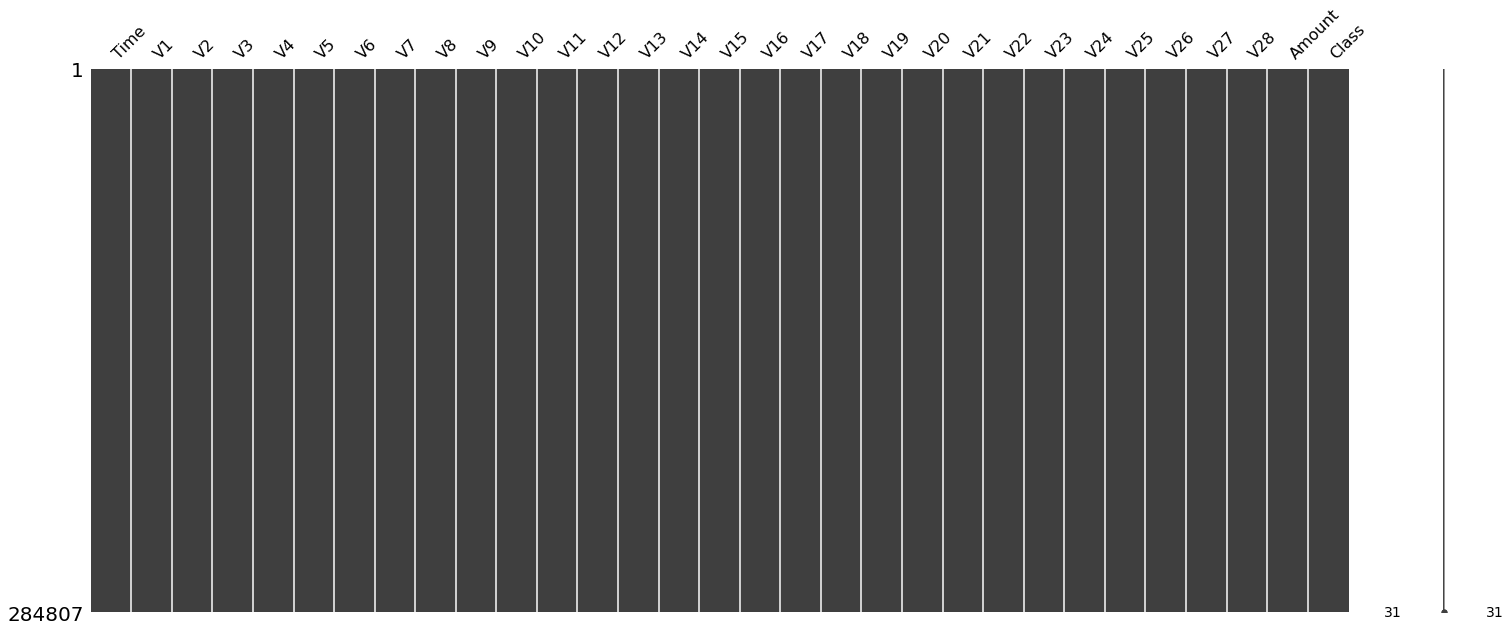

In [4]:
# we check the null values
msno.matrix(df)

In [5]:
df['Class'].value_counts() / len (df)
# We check if the data is balanced. We see that we have much more data of 0 than of 1. 

0    0.998273
1    0.001727
Name: Class, dtype: float64

In [6]:
print(df.duplicated().any())

df.drop_duplicates(inplace=True)
# we eliminate duplicates

True


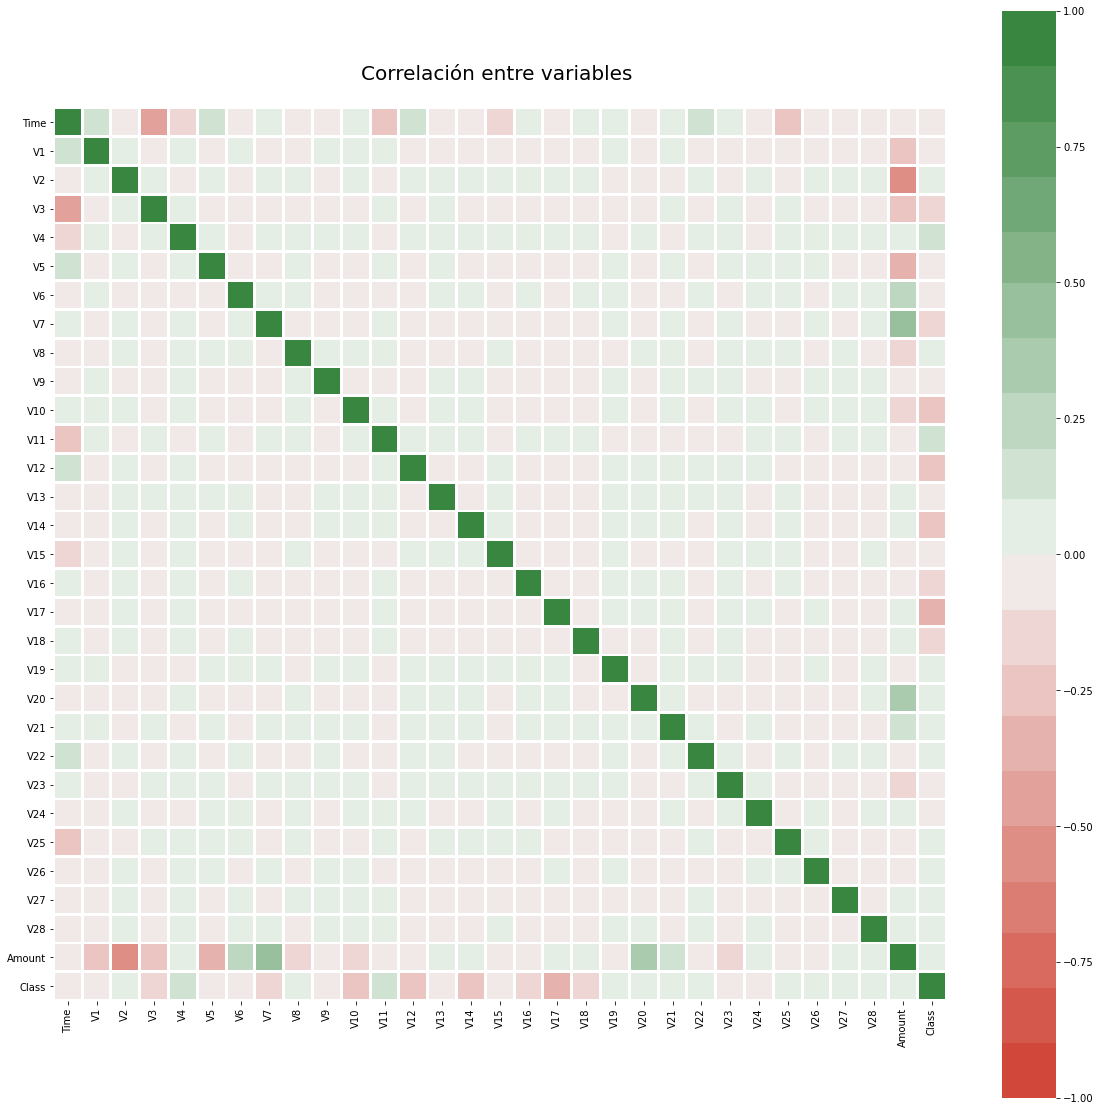

In [7]:

# The coorelation matrix is created
matriz = df.corr()

fig, ax = plt.subplots(figsize = (20,20))

mv = sns.heatmap(data = matriz, 
            vmin =-1, vmax = 1, center = 0, 
            linewidths=2, 
            square = True, 
            cmap=sns.diverging_palette(15,130, n=20))


plt.title ('Correlación entre variables \n', fontsize=20)
plt.show()


In [8]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,...,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000
mean,94811.077600,0.005917,-0.004135,0.001613,-0.002966,0.001828,-0.001139,0.001801,-0.000854,-0.001596,...,-0.000371,-0.000015,0.000198,0.000214,-0.000232,0.000149,0.001763,0.000547,88.472687,0.001667
std,47481.047891,1.948026,1.646703,1.508682,1.414184,1.377008,1.331931,1.227664,1.179054,1.095492,...,0.723909,0.724550,0.623702,0.605627,0.521220,0.482053,0.395744,0.328027,250.399437,0.040796
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.000000
25%,54204.750000,-0.915951,-0.600321,-0.889682,-0.850134,-0.689830,-0.769031,-0.552509,-0.208828,-0.644221,...,-0.228305,-0.542700,-0.161703,-0.354453,-0.317485,-0.326763,-0.070641,-0.052818,5.600000,0.000000
50%,84692.500000,0.020384,0.063949,0.179963,-0.022248,-0.053468,-0.275168,0.040859,0.021898,-0.052596,...,-0.029441,0.006675,-0.011159,0.041016,0.016278,-0.052172,0.001479,0.011288,22.000000,0.000000
75%,139298.000000,1.316068,0.800283,1.026960,0.739647,0.612218,0.396792,0.570474,0.325704,0.595977,...,0.186194,0.528245,0.147748,0.439738,0.350667,0.240261,0.091208,0.078276,77.510000,0.000000
max,172792.000000,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,...,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,1.000000


In [9]:
class1 = df["Class"]
# We create the class1 variable that contains the class column and then delete the class column from the dataframe.

In [10]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


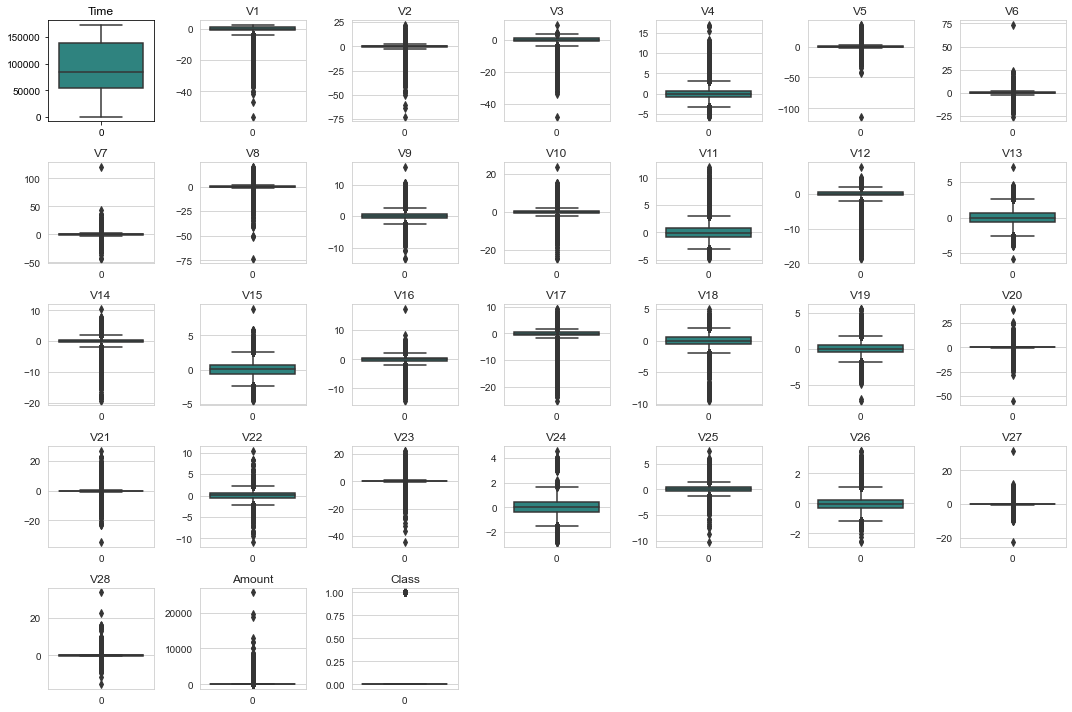

In [11]:
data_columns = df._get_numeric_data().columns.values
plot_columns = 7
number_of_columns = math.ceil(len(data_columns)/plot_columns)
number_of_rows = math.ceil((len(data_columns))/number_of_columns)

plt.figure(figsize=(15,10))
for i in range(0,len(data_columns)):
    plt.subplot(number_of_columns, number_of_rows, i+1)
    sns.set_style(style='whitegrid')
    sns.boxplot(data=df[data_columns[i]],palette='viridis',orient='v')
    plt.title(data_columns[i])
    plt.tight_layout()
    
# # We make a box plot diagram in which we can observe the distribution

C:\Users\puil\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\puil\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


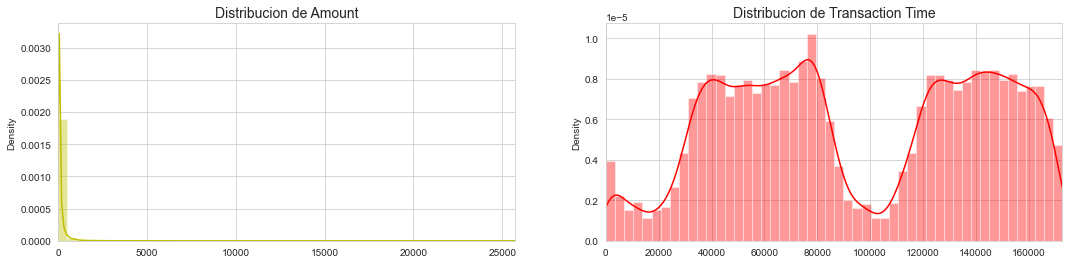

In [12]:
# distribution of the values of the columns 'Amount' and 'Time'

fig, ax = plt.subplots(1, 2, figsize=(18,4))

amount_val = df['Amount'].values
time_val = df['Time'].values

sns.distplot(amount_val, ax=ax[0], color='y')
ax[0].set_title('Distribucion de Amount', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.distplot(time_val, ax=ax[1], color='r')
ax[1].set_title('Distribucion de Transaction Time', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])



plt.show()

In [13]:
# 'amount' and 'time' are scaled to have values in the same range as the other columns

rob_scaler = RobustScaler()

df['scaled_amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1,1))

df.drop(['Time','Amount'], axis=1, inplace=True)

In [14]:
scaled_amount = df['scaled_amount']
scaled_time = df['scaled_time']

df.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True)
df.insert(0, 'scaled_amount', scaled_amount)
df.insert(1, 'scaled_time', scaled_time)

In [15]:
# We need to have a dataframe where it finds a similar amount of "frauds" as "non-frauds"
# A shuffle is made so that the choice is random

df = df.sample(frac=1)

# Cantidad de fraudes 492
fraud_df = df.loc[df['Class'] == 1]
non_fraud_df = df.loc[df['Class'] == 0][:492]

normal_distributed_df = pd.concat([fraud_df, non_fraud_df])


new_df = normal_distributed_df.sample(frac=1, random_state=42)

new_df.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
227082,-0.126825,0.707876,-0.597107,1.621909,-0.472514,0.787690,0.856498,-0.335859,1.038270,0.209745,...,-0.007343,0.208460,0.783985,-0.287587,-0.353908,0.085419,-0.384625,0.188816,0.162134,0
43428,4.758587,-0.507531,-16.526507,8.584972,-18.649853,9.505594,-13.793819,-2.832404,-16.701694,7.517344,...,-1.514923,1.190739,-1.127670,-2.358579,0.673461,-1.413700,-0.462762,-2.018575,-1.042804,1
42856,2.100820,-0.510258,-11.682215,6.332882,-13.297109,7.690772,-10.889891,-2.792360,-12.561783,7.287122,...,-1.009320,2.133456,-1.271509,-0.035304,0.615054,0.349024,-0.428923,-0.694935,-0.818970,1
6774,-0.292032,-0.895071,0.447396,2.481954,-5.660814,4.455923,-2.443780,-2.185040,-4.716143,1.249803,...,0.549613,0.756053,0.140168,0.665411,0.131464,-1.908217,0.334808,0.748534,0.175414,1
41569,-0.292032,-0.516498,-2.377533,0.520539,-8.094139,8.005351,2.640750,-3.381586,-1.934372,0.562322,...,-0.634747,0.148284,0.721100,2.661291,-0.508620,-0.401657,0.587611,0.500326,0.551760,1


In [16]:
new_df['Class'].value_counts() / len (new_df)
# We check if the data is balanced. We see that we have much more data of 0 than of 1.

0    0.509845
1    0.490155
Name: Class, dtype: float64

C:\Users\puil\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


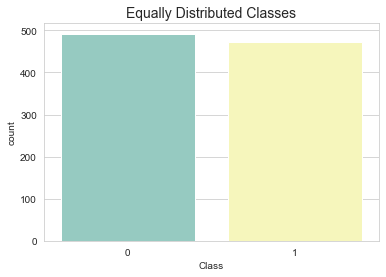

In [17]:
sns.countplot('Class', data=new_df,  palette="Set3" )
plt.title('Equally Distributed Classes', fontsize=14)
plt.show()

### Red Neuronal 

In [18]:
X = new_df.drop(columns=["Class"])
y = new_df["Class"]

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=27, shuffle=True)

#  We divide the data into 40% test data and the rest into data for training

In [20]:
print('Lenght train: ',len(y_train), ' Lenght test: ', len(X_test))

Lenght train:  772  Lenght test:  193


In [21]:
tfX_train = tf.convert_to_tensor(X_train)
tfX_test = tf.convert_to_tensor(X_test)
tfy_train = tf.convert_to_tensor(y_train)
tfy_test = tf.convert_to_tensor(y_test)

In [22]:

num_inputs = tfX_train.shape[1]
model = Sequential()                                                                    
model.add(Dense(8, input_shape=(num_inputs,), activation='sigmoid'))                             
model.add(Dense(2,  activation='sigmoid')) 
model.add(Dense(1,  activation='sigmoid')) 
model.compile(Adam(lr=0.05), 'binary_crossentropy', metrics=['accuracy']) 

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 248       
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 18        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 3         
Total params: 269
Trainable params: 269
Non-trainable params: 0
_________________________________________________________________


In [24]:
model.fit(tfX_train, tfy_train, epochs = 3, verbose=1) 

Epoch 1/3
25/25 [==============================] - 1s 792us/step - loss: 0.6273 - accuracy: 0.7411
Epoch 2/3
25/25 [==============================] - 0s 834us/step - loss: 0.3200 - accuracy: 0.9318
Epoch 3/3
25/25 [==============================] - 0s 875us/step - loss: 0.2088 - accuracy: 0.9516


In [25]:

resultstest = model.evaluate(tfX_test, tfy_test)  

7/7 [==============================] - 0s 1ms/step - loss: 0.2198 - accuracy: 0.9326


In [26]:
y_pred = model.predict_classes(tfX_test)
y_pred

C:\Users\puil\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([[1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
    

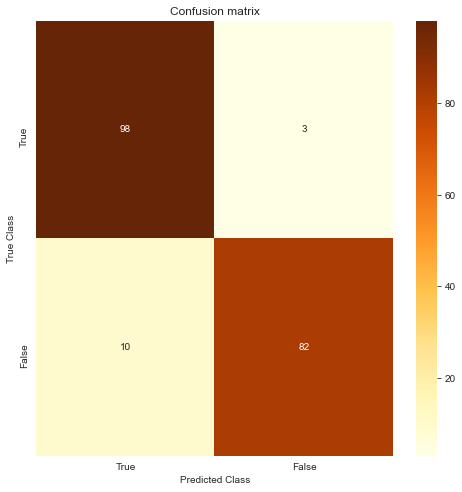

In [27]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 8))
labels = ["True","False"]
sns.heatmap(conf_matrix, xticklabels=labels, yticklabels=labels, annot=True,cmap="YlOrBr");
plt.title("Confusion matrix")
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.show()

In [28]:
def metricas_modelo():      
    print(classification_report(y_test, y_pred))

In [29]:
metricas_modelo()

              precision    recall  f1-score   support

           0       0.91      0.97      0.94       101
           1       0.96      0.89      0.93        92

    accuracy                           0.93       193
   macro avg       0.94      0.93      0.93       193
weighted avg       0.93      0.93      0.93       193



AUC score: 0.9308006887645286


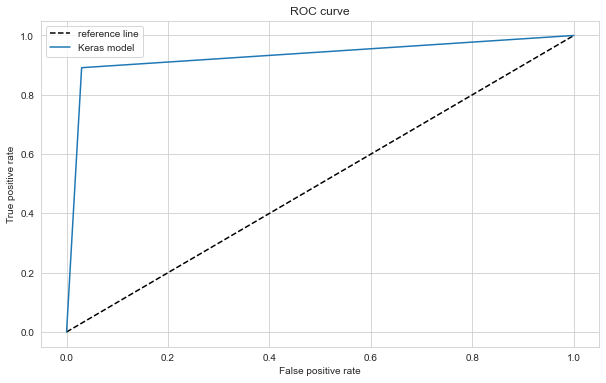

In [30]:
from sklearn.metrics import roc_auc_score, roc_curve


fpr, tpr, _ = roc_curve(y_test, y_pred)
AUC_score = roc_auc_score(y_test, y_pred)
print('AUC score:', AUC_score)

plt.figure(figsize=(10,6))
plt.plot([0, 1], [0, 1], 'k--', label='reference line')
plt.plot(fpr, tpr, label='Keras model')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()